k-means clustering is probably the most popular clustering algorithms for unsupervised learning. And while it may seem 
complex to beginners, it is actually fairly straightforward and powerful. One key drawback, however, is that the algorithm does
not do well with mixed datasets - those that contain numerical and categorical variables together. It only works with numerical 
features. Encoding techniques such as OneHotEncoding or LabelEncoding on the categorical features does not yield great results.

One solution is using k-prototypes clustering algorithm which combines k-means and k-modes algorithms to deliver an algorithm
that can cluster such datasets.

For this exercise we'll be using Bank Marketing Data Set provided by UCI ML Repository:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
!pip install kmodes   # installing kmodes

#### Import libraries

In [35]:
#importing the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset and performing basic EDA/cleaning

In [29]:
#importing the dataset
df = pd.read_csv('bank.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [30]:
#Getting feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [31]:
#Based on feature information available from the UCI ML Library, we discard 'contact', 'day' and 'month'
#as these features have no direct effect on the clustering. We keep 'y' as a benchmark for our clusters

df = df.drop(columns = ['contact','day','month'], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,-1,0,unknown,no


In [32]:
#We convert our dataframe into a numpy array for the algorithm
df_arr = df.values

In [33]:
#We convert numerical features from int to float as that's the requirement of the algorithm
df_arr[:, 0] = df_arr[:, 0].astype(float)
df_arr[:, 5] = df_arr[:, 5].astype(float)
df_arr[:, 8] = df_arr[:, 8].astype(float)
df_arr[:, 9] = df_arr[:, 9].astype(float)
df_arr[:, 10] = df_arr[:, 10].astype(float)
df_arr[:, 11] = df_arr[:, 11].astype(float)

#### Using Elbow Method for optimum number of clusters and modeling

In [68]:
from kmodes.kprototypes import KPrototypes
wcss = []                   #wcss or the cost function list
#Setting up a loop to complete the wcss list and KPrototypes with Cao initialization
for i in range(1, 15):
    kproto = KPrototypes(n_clusters = i, verbose = 1, init = "Cao", max_iter = 3, random_state = 42)
    kproto.fit(df_arr, categorical=[1, 2, 3, 4,6,7,12,13])
    wcss.append(kproto.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/3, moves: 0, ncost: 41300612768.367836
Init: initializing c

Run: 1, iteration: 3/3, moves: 717, ncost: 11621548607.886494
Run: 1, iteration: 4/3, moves: 1620, ncost: 9769279820.577108
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 1596, ncost: 21325776964.30231
Run: 2, iteration: 2/3, moves: 2190, ncost: 16839984561.196808
Run: 2, iteration: 3/3, moves: 1254, ncost: 13311312076.138285
Run: 2, iteration: 4/3, moves: 775, ncost: 11341720540.068632
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 427, ncost: 9537437020.890831
Run: 3, iteration: 2/3, moves: 200, ncost: 8116173623.721217
Run: 3, iteration: 3/3, moves: 156, ncost: 7621267238.136695
Run: 3, iteration: 4/3, moves: 142, ncost: 7416230969.324289
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/3, moves: 1542, ncost: 21437639512.55316
Run: 4, iteration: 2/3, moves: 2131, ncost: 16981328108.764389
Run: 4, iteration

Starting iterations...
Run: 6, iteration: 1/3, moves: 1627, ncost: 7993055598.982801
Run: 6, iteration: 2/3, moves: 755, ncost: 6976324713.663985
Run: 6, iteration: 3/3, moves: 468, ncost: 6480266596.241545
Run: 6, iteration: 4/3, moves: 328, ncost: 6037024497.773345
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/3, moves: 839, ncost: 10796663329.93212
Run: 7, iteration: 2/3, moves: 538, ncost: 8197265386.426884
Run: 7, iteration: 3/3, moves: 342, ncost: 7039184534.704525
Run: 7, iteration: 4/3, moves: 332, ncost: 6479071619.536564
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/3, moves: 542, ncost: 6895936993.067883
Run: 8, iteration: 2/3, moves: 423, ncost: 5515204213.390883
Run: 8, iteration: 3/3, moves: 301, ncost: 4783097801.287422
Run: 8, iteration: 4/3, moves: 222, ncost: 4403731591.179764
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run:

Run: 9, iteration: 1/3, moves: 1269, ncost: 7174755142.180253
Run: 9, iteration: 2/3, moves: 697, ncost: 6164285936.672167
Run: 9, iteration: 3/3, moves: 362, ncost: 5492273135.053058
Run: 9, iteration: 4/3, moves: 257, ncost: 5074679810.152018
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/3, moves: 1084, ncost: 11330281670.779911
Run: 10, iteration: 2/3, moves: 670, ncost: 8635247654.192217
Run: 10, iteration: 3/3, moves: 366, ncost: 7076839853.947861
Run: 10, iteration: 4/3, moves: 318, ncost: 6411561766.177424
Best run was number 8
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 760, ncost: 8414303078.238211
Run: 1, iteration: 2/3, moves: 447, ncost: 6428570085.144366
Run: 1, iteration: 3/3, moves: 477, ncost: 5677166840.242267
Run: 1, iteration: 4/3, mo

Run: 1, iteration: 2/3, moves: 348, ncost: 5824090870.077043
Run: 1, iteration: 3/3, moves: 335, ncost: 4979940429.568878
Run: 1, iteration: 4/3, moves: 340, ncost: 4422838782.889265
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 1195, ncost: 5702032487.113705
Run: 2, iteration: 2/3, moves: 524, ncost: 4899705831.866627
Run: 2, iteration: 3/3, moves: 363, ncost: 4443317087.791766
Run: 2, iteration: 4/3, moves: 255, ncost: 4106039706.814416
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 830, ncost: 7895666427.294542
Run: 3, iteration: 2/3, moves: 501, ncost: 6003455434.942273
Run: 3, iteration: 3/3, moves: 275, ncost: 5164041609.592963
Run: 3, iteration: 4/3, moves: 184, ncost: 4717707296.758988
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing cluste

Run: 3, iteration: 4/3, moves: 206, ncost: 4646319691.525532
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/3, moves: 933, ncost: 5783835410.504161
Run: 4, iteration: 2/3, moves: 605, ncost: 4852572662.290074
Run: 4, iteration: 3/3, moves: 435, ncost: 4151167269.7114434
Run: 4, iteration: 4/3, moves: 353, ncost: 3672827170.471463
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/3, moves: 992, ncost: 8671908149.34744
Run: 5, iteration: 2/3, moves: 742, ncost: 6415822718.985047
Run: 5, iteration: 3/3, moves: 616, ncost: 5450053419.830795
Run: 5, iteration: 4/3, moves: 572, ncost: 4767992987.3422365
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/3, moves: 1052, ncost: 7419805819.286317
Run: 6, iteration: 2/3, moves: 639, ncost: 6219370521.042953
Run: 6, iteration: 3/3, moves:

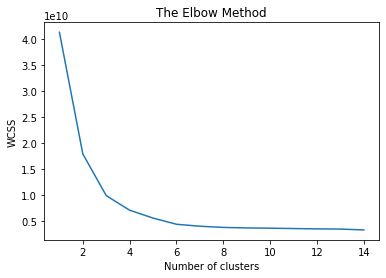

In [69]:
#Plotting the Elbow
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#We take k = 6

In [70]:
#Training the model and using fit_predict method
kproto = KPrototypes(n_clusters=6, verbose=1,max_iter=3)
clusters = kproto.fit_predict(df_arr, categorical=[1, 2, 3, 4,6,7,12,13])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/3, moves: 925, ncost: 11557026620.382027
Run: 1, iteration: 2/3, moves: 694, ncost: 9594793627.149137
Run: 1, iteration: 3/3, moves: 576, ncost: 8294905188.212855
Run: 1, iteration: 4/3, moves: 405, ncost: 7679176929.032414
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/3, moves: 955, ncost: 11933104008.873957
Run: 2, iteration: 2/3, moves: 710, ncost: 9345991151.40226
Run: 2, iteration: 3/3, moves: 415, ncost: 7754206169.348931
Run: 2, iteration: 4/3, moves: 450, ncost: 6992173793.037446
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/3, moves: 476, ncost: 6745224809.346219
Run: 3, iteration: 2/3, moves: 172, ncost: 5822082810.5985775
Run: 3, iteration: 3/3, moves: 131, ncost: 5316299526.489688
Run: 3, iteration: 4/3, moves: 100, ncost: 4923613700.848272
Init: initializing centroi

In [71]:
#Printing the centroids
print(kproto.cluster_centroids_)

[array([[4.04536360e+01, 1.31742978e+02, 2.52074259e+02, 2.91304348e+00,
        3.68264717e+01, 4.63255098e-01],
       [4.31764706e+01, 5.38733824e+03, 2.74676471e+02, 2.75735294e+00,
        4.24632353e+01, 6.76470588e-01],
       [4.31550388e+01, 1.06575581e+04, 2.30108527e+02, 3.04651163e+00,
        3.90620155e+01, 7.98449612e-01],
       [4.27613883e+01, 2.88725597e+03, 2.81757050e+02, 2.68112798e+00,
        3.78199566e+01, 5.53145336e-01],
       [4.13436893e+01, 1.15694854e+03, 2.89661165e+02, 2.53009709e+00,
        4.71708738e+01, 6.71844660e-01],
       [4.61000000e+01, 2.42191000e+04, 1.86366667e+02, 2.46666667e+00,
        4.87666667e+01, 5.00000000e-01]]), array([['blue-collar', 'married', 'secondary', 'no', 'yes', 'no',
        'unknown', 'no'],
       ['management', 'married', 'secondary', 'no', 'yes', 'no',
        'unknown', 'no'],
       ['management', 'married', 'secondary', 'no', 'yes', 'no',
        'unknown', 'no'],
       ['management', 'married', 'secondary',

In [72]:
#Creating a list of clusters to later append to the original dataset
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [73]:
#Appending with main dataset
df['cluster']=cluster_dict

In [74]:
#Checking the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
0,30,unemployed,married,primary,no,1787,no,no,79,1,-1,0,unknown,no,4
1,33,services,married,secondary,no,4789,yes,yes,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,185,1,330,1,failure,no,4
3,30,management,married,tertiary,no,1476,yes,yes,199,4,-1,0,unknown,no,4
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,-1,0,unknown,no,0


In [75]:
#With cluster 1
df[df['cluster']== 0].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,-1,0,unknown,no,0
6,36,self-employed,married,tertiary,no,307,yes,no,341,1,330,2,other,no,0
7,39,technician,married,secondary,no,147,yes,no,151,2,-1,0,unknown,no,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,57,2,-1,0,unknown,no,0
9,43,services,married,primary,no,-88,yes,yes,313,1,147,2,failure,no,0
11,43,admin.,married,secondary,no,264,yes,no,113,2,-1,0,unknown,no,0
13,20,student,single,secondary,no,502,no,no,261,1,-1,0,unknown,yes,0
14,31,blue-collar,married,secondary,no,360,yes,yes,89,1,241,1,failure,no,0
15,40,management,married,tertiary,no,194,no,yes,189,2,-1,0,unknown,no,0
18,25,blue-collar,single,primary,no,-221,yes,no,250,1,-1,0,unknown,no,0


In [76]:
#With cluster 2
df[df['cluster']== 1].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
1,33,services,married,secondary,no,4789,yes,yes,220,1,339,4,failure,no,1
25,41,management,married,tertiary,no,5883,no,no,182,2,-1,0,unknown,no,1
30,68,retired,divorced,secondary,no,4189,no,no,897,2,-1,0,unknown,yes,1
49,61,admin.,married,unknown,no,4629,yes,no,181,1,92,1,success,yes,1
62,48,management,married,tertiary,no,5887,no,no,227,2,-1,0,unknown,no,1
72,31,management,single,tertiary,no,6248,yes,no,154,2,-1,0,unknown,no,1
96,41,admin.,married,tertiary,no,5426,yes,no,149,2,-1,0,unknown,no,1
102,49,technician,married,secondary,no,5996,no,no,345,2,-1,0,unknown,no,1
129,77,retired,divorced,tertiary,no,4659,no,no,161,1,-1,0,unknown,yes,1
139,60,management,married,unknown,no,6313,no,no,39,2,-1,0,unknown,no,1


In [77]:
#With cluster 3
df[df['cluster']== 2].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
10,39,services,married,secondary,no,9374,yes,no,273,1,-1,0,unknown,no,2
40,38,management,single,tertiary,no,11971,yes,no,609,2,101,3,failure,no,2
64,56,admin.,married,secondary,no,16873,no,no,223,1,-1,0,unknown,no,2
94,57,blue-collar,married,secondary,no,14093,no,no,231,5,-1,0,unknown,no,2
153,55,entrepreneur,married,secondary,no,8104,no,no,213,2,-1,0,unknown,no,2
174,42,management,married,tertiary,no,9009,no,no,135,2,-1,0,unknown,no,2
194,23,student,single,secondary,no,9216,no,no,471,2,-1,0,unknown,no,2
210,36,technician,single,secondary,no,9149,yes,no,141,3,-1,0,unknown,no,2
213,57,self-employed,married,secondary,no,11494,no,no,198,1,-1,0,unknown,no,2
272,46,management,married,secondary,no,12186,no,no,29,3,-1,0,unknown,no,2


In [78]:
#With cluster 4
df[df['cluster']== 3].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
16,56,technician,married,secondary,no,4073,no,no,239,5,-1,0,unknown,no,3
17,37,admin.,single,tertiary,no,2317,yes,no,114,1,152,2,failure,no,3
33,32,management,single,tertiary,no,2536,yes,no,958,6,-1,0,unknown,yes,3
37,32,blue-collar,married,secondary,no,2089,yes,no,132,1,-1,0,unknown,yes,3
38,33,management,married,secondary,no,3935,yes,no,765,1,342,2,failure,yes,3
44,32,technician,single,tertiary,no,2204,yes,no,11,4,-1,0,unknown,no,3
54,53,blue-collar,married,secondary,no,2231,yes,no,272,3,-1,0,unknown,no,3
55,48,admin.,married,secondary,no,3064,yes,no,159,2,-1,0,unknown,no,3
57,33,self-employed,single,tertiary,no,2155,no,no,295,1,-1,0,unknown,no,3
75,54,management,divorced,tertiary,no,3222,no,no,67,2,-1,0,unknown,no,3


In [79]:
#With cluster 5
df[df['cluster']== 4].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
0,30,unemployed,married,primary,no,1787,no,no,79,1,-1,0,unknown,no,4
2,35,management,single,tertiary,no,1350,yes,no,185,1,330,1,failure,no,4
3,30,management,married,tertiary,no,1476,yes,yes,199,4,-1,0,unknown,no,4
5,35,management,single,tertiary,no,747,no,no,141,2,176,3,failure,no,4
12,36,technician,married,tertiary,no,1109,no,no,328,2,-1,0,unknown,no,4
27,67,retired,married,unknown,no,696,no,no,119,1,105,2,failure,no,4
28,56,self-employed,married,secondary,no,784,no,yes,149,2,-1,0,unknown,no,4
34,49,technician,married,tertiary,no,1235,no,no,354,3,-1,0,unknown,yes,4
35,42,admin.,divorced,secondary,no,1811,yes,no,150,1,-1,0,unknown,no,4
42,52,blue-collar,married,secondary,no,1117,yes,no,365,1,-1,0,unknown,no,4


In [80]:
#With cluster 6
df[df['cluster']== 5].head(30)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,cluster
650,33,housemaid,single,tertiary,no,23663,yes,no,199,2,146,2,failure,no,5
871,31,housemaid,single,primary,no,26965,no,no,654,2,-1,0,unknown,yes,5
877,30,management,single,tertiary,no,19358,no,no,258,2,-1,0,unknown,no,5
1031,49,retired,single,primary,no,25824,no,no,94,1,-1,0,unknown,no,5
1483,43,technician,single,tertiary,no,27733,yes,no,164,7,-1,0,unknown,no,5
1776,43,management,married,secondary,no,17555,no,no,14,14,-1,0,unknown,no,5
1821,51,housemaid,married,unknown,no,21244,no,yes,166,2,-1,0,unknown,no,5
1881,36,management,married,tertiary,no,27359,yes,no,71,2,-1,0,unknown,no,5
1887,33,management,married,unknown,no,18347,yes,no,415,1,-1,0,unknown,no,5
2196,54,management,divorced,tertiary,no,26306,yes,no,27,1,84,3,failure,no,5
